#                                                                Wine Quality Prediction

## Problem Statement

This project aims to create a model that predicts the quality of wine using its chemical properties, such as acidity and alcohol content.
By looking at these factors, we want to find out what makes wine good or bad.
The model will help winemakers understand how to improve their products.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("wine_dataset.csv")

In [3]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,white,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.0,Bad for Health
1,white,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,Bad for Health
2,white,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.8,Bad for Health
3,white,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,Bad for Health
4,white,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,Bad for Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,white,6.7,0.27,0.33,3.60,0.034,9.0,45.0,0.99144,3.08,0.40,10.5,Good for Health
4764,red,10.0,0.42,0.50,3.40,0.107,7.0,21.0,0.99790,3.26,0.93,11.8,Good for Health
4765,white,6.5,0.23,0.33,13.80,0.042,25.0,139.0,0.99695,3.35,0.56,10.4,Good for Health
4766,white,6.3,0.67,0.48,12.60,0.052,57.0,222.0,0.99790,3.17,0.52,9.3,Good for Health


# Columns

In [4]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'best quality'],
      dtype='object')

# Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4768 non-null   object 
 1   fixed acidity         4760 non-null   float64
 2   volatile acidity      4764 non-null   float64
 3   citric acid           4766 non-null   float64
 4   residual sugar        4767 non-null   float64
 5   chlorides             4766 non-null   float64
 6   free sulfur dioxide   4768 non-null   float64
 7   total sulfur dioxide  4768 non-null   float64
 8   density               4768 non-null   float64
 9   pH                    4762 non-null   float64
 10  sulphates             4764 non-null   float64
 11  alcohol               4768 non-null   float64
 12  best quality          4768 non-null   object 
dtypes: float64(11), object(2)
memory usage: 484.4+ KB


# Statistics of dataset

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4760.000000,4764.000000,4766.000000,4767.000000,4766.000000,4768.000000,4768.000000,4768.000000,4762.000000,4764.000000,4768.000000
mean,7.244391,0.351553,0.316225,5.526002,0.057923,30.296351,116.654572,0.994933,3.216170,0.529530,10.359237
std,1.291771,0.171212,0.151252,4.864268,0.037664,18.201756,57.661825,0.002961,0.160482,0.148424,1.157506
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.039000,16.000000,76.000000,0.992700,3.110000,0.430000,9.400000
50%,7.000000,0.300000,0.310000,3.000000,0.048000,28.000000,119.000000,0.995200,3.200000,0.500000,10.100000
75%,7.700000,0.420000,0.390000,8.200000,0.068000,41.000000,158.000000,0.997182,3.320000,0.600000,11.100000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


# Value count

#### 1) type

In [7]:
df["type"].value_counts()

type
white    3533
red      1235
Name: count, dtype: int64

#### 2) fixed acidity

In [8]:
df["fixed acidity"].value_counts()

fixed acidity
6.8     261
6.6     239
6.4     223
7.2     211
7.0     207
       ... 
13.0      1
12.1      1
15.9      1
13.5      1
13.4      1
Name: count, Length: 101, dtype: int64

#### 3) volatile acidity

In [9]:
df["volatile acidity"].value_counts()

volatile acidity
0.280    209
0.260    186
0.240    186
0.250    175
0.300    167
        ... 
0.890      1
0.860      1
0.795      1
0.425      1
1.010      1
Name: count, Length: 185, dtype: int64

#### 4) citric acid

In [10]:
df["citric acid"].value_counts()

citric acid
0.30    229
0.28    207
0.49    202
0.26    194
0.32    194
       ... 
0.91      2
0.86      1
0.88      1
1.66      1
0.75      1
Name: count, Length: 87, dtype: int64

#### 5) residual sugar

In [11]:
df["residual sugar"].value_counts()

residual sugar
1.60     172
2.00     172
1.80     170
1.40     156
1.70     137
        ... 
5.85       1
16.50      1
16.90      1
5.35       1
7.45       1
Name: count, Length: 298, dtype: int64

#### 6) chlorides

In [12]:
df["chlorides"].value_counts()

chlorides
0.046    142
0.042    139
0.036    138
0.050    138
0.048    138
        ... 
0.236      1
0.240      1
0.290      1
0.178      1
0.332      1
Name: count, Length: 208, dtype: int64

#### 7) free sulfur dioxide

In [13]:
df["free sulfur dioxide"].value_counts()

free sulfur dioxide
15.0    127
29.0    120
6.0     120
24.0    116
26.0    113
       ... 
61.5      1
51.5      1
28.5      1
43.5      1
64.5      1
Name: count, Length: 128, dtype: int64

#### 8) total sulfur dioxide

In [14]:
df["total sulfur dioxide"].value_counts()

total sulfur dioxide
111.0    48
113.0    47
133.0    46
128.0    44
124.0    43
         ..
344.0     1
307.5     1
234.5     1
366.5     1
189.5     1
Name: count, Length: 271, dtype: int64

#### 9) density

In [15]:
df["density"].value_counts()

density
0.99800    56
0.99760    53
0.99280    51
0.99680    51
0.99860    50
           ..
0.99908     1
0.99264     1
0.99302     1
0.99375     1
0.99695     1
Name: count, Length: 920, dtype: int64

#### 10) pH

In [16]:
df["pH"].value_counts()

pH
3.14    150
3.16    145
3.22    141
3.18    132
3.15    129
       ... 
3.64      1
3.78      1
4.01      1
3.70      1
3.76      1
Name: count, Length: 103, dtype: int64

#### 11) sulphates

In [17]:
df["sulphates"].value_counts()

sulphates
0.50    204
0.46    186
0.44    170
0.54    169
0.48    169
       ... 
1.22      1
1.12      1
1.20      1
1.56      1
1.13      1
Name: count, Length: 107, dtype: int64

#### 12) alcohol 

In [18]:
df["alcohol"].value_counts()

alcohol
9.500000     314
9.400000     284
9.200000     234
10.000000    186
9.000000     176
            ... 
9.050000       1
10.033333      1
10.650000      1
11.550000      1
11.733333      1
Name: count, Length: 98, dtype: int64

#### 13) best quality

In [19]:
df["best quality"].value_counts()

best quality
Bad for Health     2384
Good for Health    2384
Name: count, dtype: int64

# Null value

In [20]:
df.isnull().sum()

type                    0
fixed acidity           8
volatile acidity        4
citric acid             2
residual sugar          1
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      6
sulphates               4
alcohol                 0
best quality            0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4768 non-null   object 
 1   fixed acidity         4760 non-null   float64
 2   volatile acidity      4764 non-null   float64
 3   citric acid           4766 non-null   float64
 4   residual sugar        4767 non-null   float64
 5   chlorides             4766 non-null   float64
 6   free sulfur dioxide   4768 non-null   float64
 7   total sulfur dioxide  4768 non-null   float64
 8   density               4768 non-null   float64
 9   pH                    4762 non-null   float64
 10  sulphates             4764 non-null   float64
 11  alcohol               4768 non-null   float64
 12  best quality          4768 non-null   object 
dtypes: float64(11), object(2)
memory usage: 484.4+ KB


# Handling Null values.

#### 1) fixed acidity	

In [22]:
df["fixed acidity"].fillna(df["fixed acidity"].mean(),inplace=True)
print(df["fixed acidity"].isnull().sum())

0


#### 2) volatile acidity	

In [23]:
df["volatile acidity"].fillna(df["volatile acidity"].mean(),inplace=True)
print(df["volatile acidity"].isnull().sum())

0


#### 3) citric acid	

In [24]:
df["citric acid"].fillna(df["citric acid"].mean(),inplace=True)
print(df["citric acid"].isnull().sum())

0


#### 4) residual sugar	

In [25]:
df["residual sugar"].fillna(df["residual sugar"].mean(),inplace=True)
print(df["residual sugar"].isnull().sum())

0


#### 5) chlorides

In [26]:
df["chlorides"].fillna(df["chlorides"].mean(),inplace=True)
print(df["chlorides"].isnull().sum())

0


#### 6) pH

In [27]:
df["pH"].fillna(df["pH"].mean(),inplace=True)
print(df["pH"].isnull().sum())

0


#### 7) sulphates

In [28]:
df["sulphates"].fillna(df["sulphates"].mean(),inplace=True)
print(df["sulphates"].isnull().sum())

0


# Handling the Outliers

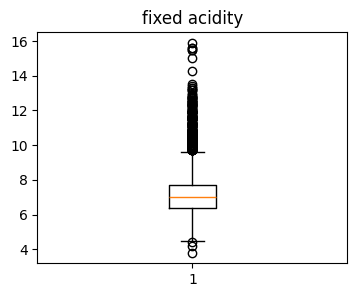

for column fixed acidity
IQR----- 1.2999999999999998
Upper Whisker--- 9.65
Lower Whisker--- 4.450000000000001


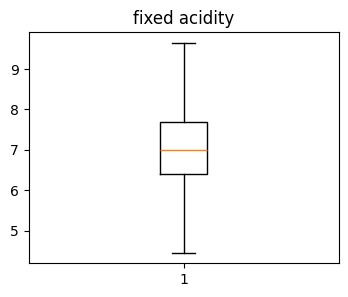

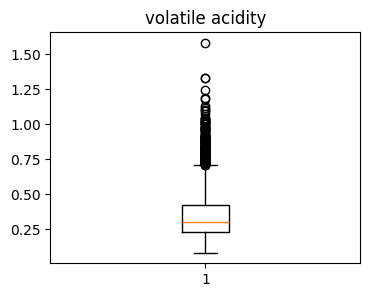

for column volatile acidity
IQR----- 0.18999999999999997
Upper Whisker--- 0.705
Lower Whisker--- -0.054999999999999966


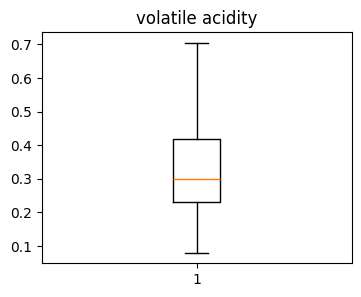

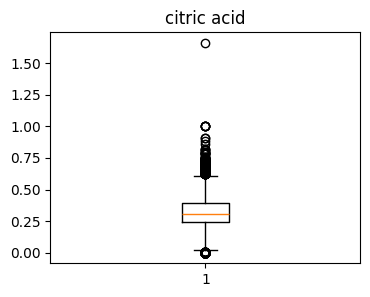

for column citric acid
IQR----- 0.15000000000000002
Upper Whisker--- 0.615
Lower Whisker--- 0.014999999999999958


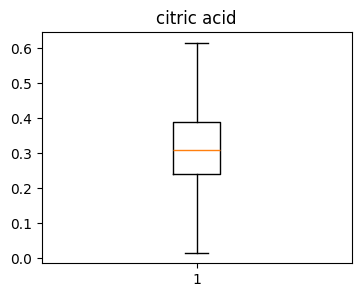

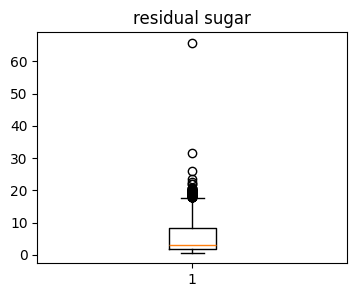

for column residual sugar
IQR----- 6.3999999999999995
Upper Whisker--- 17.799999999999997
Lower Whisker--- -7.8


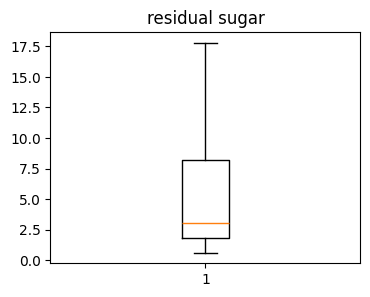

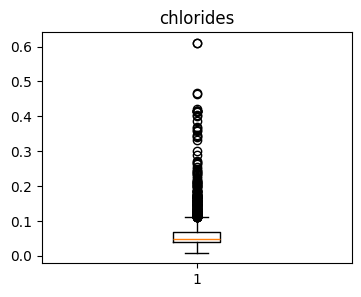

for column chlorides
IQR----- 0.029000000000000005
Upper Whisker--- 0.11150000000000002
Lower Whisker--- -0.004500000000000011


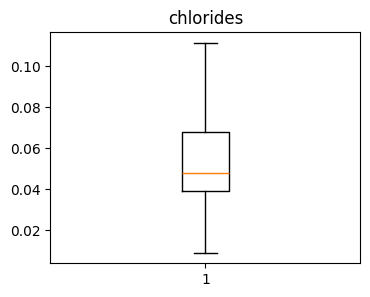

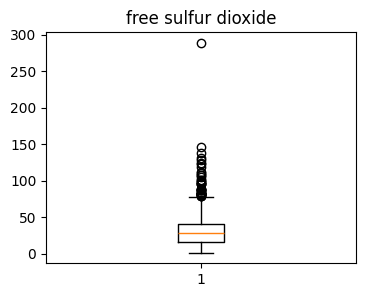

for column free sulfur dioxide
IQR----- 25.0
Upper Whisker--- 78.5
Lower Whisker--- -21.5


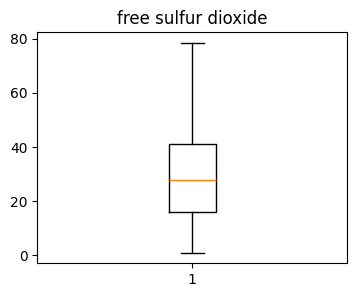

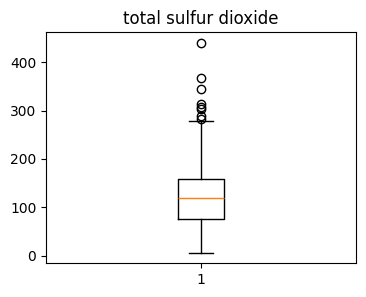

for column total sulfur dioxide
IQR----- 82.0
Upper Whisker--- 281.0
Lower Whisker--- -47.0


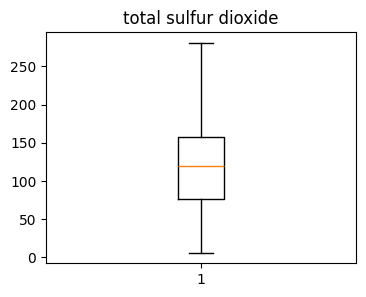

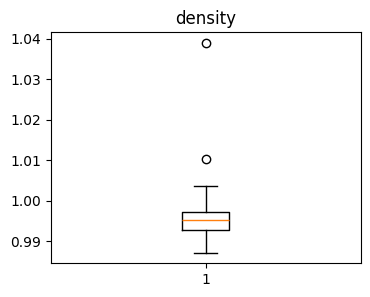

for column density
IQR----- 0.004482499999999945
Upper Whisker--- 1.00390625
Lower Whisker--- 0.9859762500000001


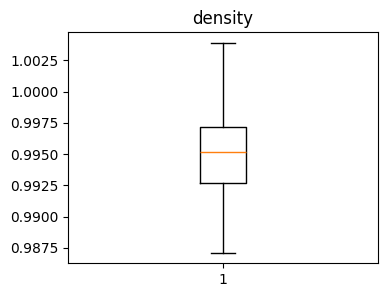

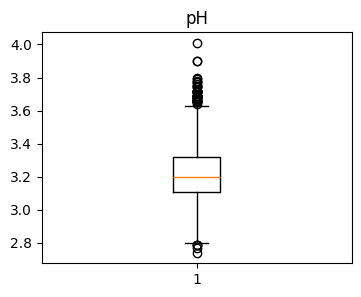

for column pH
IQR----- 0.20999999999999996
Upper Whisker--- 3.635
Lower Whisker--- 2.795


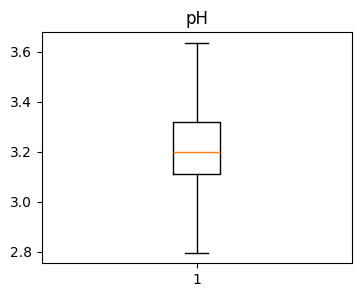

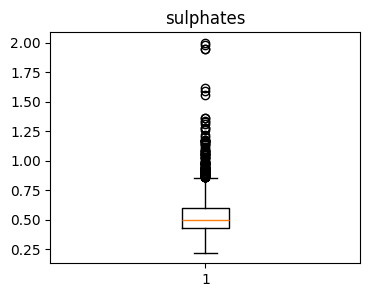

for column sulphates
IQR----- 0.16999999999999998
Upper Whisker--- 0.855
Lower Whisker--- 0.175


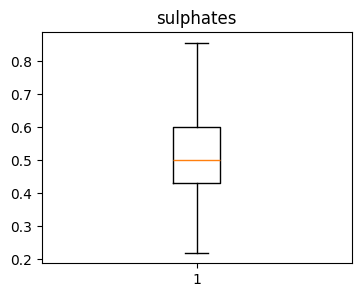

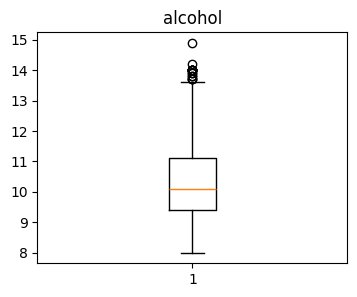

for column alcohol
IQR----- 1.6999999999999993
Upper Whisker--- 13.649999999999999
Lower Whisker--- 6.850000000000001


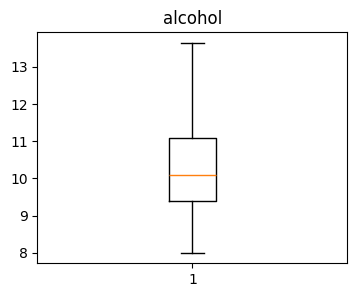

In [29]:
for  i in df.describe().columns:
    plt.figure(figsize=(4,3))
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

    
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    uppr=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    print("for column" ,i) 
    print("IQR-----",iqr)
    print("Upper Whisker---",uppr)
    print("Lower Whisker---",lower)
    
    df.loc[df[i]<lower,i]=lower
    df.loc[df[i]>uppr,i]=uppr
    
    plt.figure(figsize=(4,3))
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

# Skewness

In [30]:
for i in df.describe().columns:
    s1=skew(df[i]) 
    print(i," = ",s1)

fixed acidity  =  0.638068355932152
volatile acidity  =  0.9159264474751231
citric acid  =  -0.007104434419001005
residual sugar  =  1.0597359519446328
chlorides  =  0.9710034862022643
free sulfur dioxide  =  0.520213062645278
total sulfur dioxide  =  -0.038122760234138346
density  =  -0.08032254459973746
pH  =  0.28267986410555795
sulphates  =  0.683624174770289
alcohol  =  0.691754269123784


# Scalling of dataset

In [31]:
ms = MinMaxScaler()
for i in df.describe().columns:
    df[i]=ms.fit_transform(df[[i]])

In [32]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,white,0.701923,0.304,0.658333,0.049419,0.234146,0.129032,0.207273,0.219692,0.232143,0.535433,0.707965,Bad for Health
1,white,0.798077,0.240,0.641667,0.209302,0.253659,0.206452,0.374545,0.451887,0.410714,0.488189,0.300885,Bad for Health
2,white,0.663462,0.160,0.591667,0.034884,0.302439,0.193548,0.250909,0.291136,0.458333,0.645669,0.495575,Bad for Health
3,white,0.740385,0.544,1.000000,1.000000,0.302439,0.516129,0.603636,0.779341,0.220238,0.708661,0.300885,Bad for Health
4,white,0.394231,0.368,0.208333,0.401163,0.341463,0.425806,0.461818,0.499516,0.505952,0.440945,0.265487,Bad for Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,white,0.432692,0.304,0.525000,0.174419,0.243902,0.103226,0.141818,0.257796,0.339286,0.283465,0.442478,Good for Health
4764,red,1.000000,0.544,0.808333,0.162791,0.956098,0.077419,0.054545,0.642405,0.553571,1.000000,0.672566,Good for Health
4765,white,0.394231,0.240,0.525000,0.767442,0.321951,0.309677,0.483636,0.585845,0.660714,0.535433,0.424779,Good for Health
4766,white,0.355769,0.944,0.775000,0.697674,0.419512,0.722581,0.785455,0.642405,0.446429,0.472441,0.230088,Good for Health


# Label Encoding 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4768 non-null   object 
 1   fixed acidity         4768 non-null   float64
 2   volatile acidity      4768 non-null   float64
 3   citric acid           4768 non-null   float64
 4   residual sugar        4768 non-null   float64
 5   chlorides             4768 non-null   float64
 6   free sulfur dioxide   4768 non-null   float64
 7   total sulfur dioxide  4768 non-null   float64
 8   density               4768 non-null   float64
 9   pH                    4768 non-null   float64
 10  sulphates             4768 non-null   float64
 11  alcohol               4768 non-null   float64
 12  best quality          4768 non-null   object 
dtypes: float64(11), object(2)
memory usage: 484.4+ KB


In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"])
df["best quality"]=le.fit_transform(df["best quality"])

In [35]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,1,0.701923,0.304,0.658333,0.049419,0.234146,0.129032,0.207273,0.219692,0.232143,0.535433,0.707965,0
1,1,0.798077,0.240,0.641667,0.209302,0.253659,0.206452,0.374545,0.451887,0.410714,0.488189,0.300885,0
2,1,0.663462,0.160,0.591667,0.034884,0.302439,0.193548,0.250909,0.291136,0.458333,0.645669,0.495575,0
3,1,0.740385,0.544,1.000000,1.000000,0.302439,0.516129,0.603636,0.779341,0.220238,0.708661,0.300885,0
4,1,0.394231,0.368,0.208333,0.401163,0.341463,0.425806,0.461818,0.499516,0.505952,0.440945,0.265487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,1,0.432692,0.304,0.525000,0.174419,0.243902,0.103226,0.141818,0.257796,0.339286,0.283465,0.442478,1
4764,0,1.000000,0.544,0.808333,0.162791,0.956098,0.077419,0.054545,0.642405,0.553571,1.000000,0.672566,1
4765,1,0.394231,0.240,0.525000,0.767442,0.321951,0.309677,0.483636,0.585845,0.660714,0.535433,0.424779,1
4766,1,0.355769,0.944,0.775000,0.697674,0.419512,0.722581,0.785455,0.642405,0.446429,0.472441,0.230088,1


<Axes: >

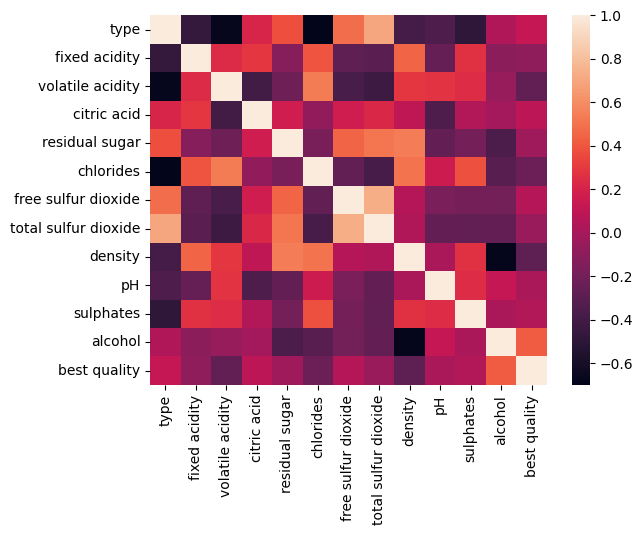

In [36]:
sns.heatmap(df.corr())

# Spliting of Data into X and Y

In [37]:
x = df.drop(['best quality'], axis=1)
y = df['best quality']

# train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score


# 1) Decision Tree Classifier

In [40]:
dt = DecisionTreeClassifier(criterion='gini',random_state=50,max_depth=10)
dt.fit(x_train, y_train)
print(dt.score(x_test,y_test)*100)
print(dt.score(x_train,y_train)*100)

74.94758909853249
89.51232302045096


In [41]:
# Testing Accuracy
y_pred_test = dt.predict(x_test)

cnf_matrix = confusion_matrix(y_pred_test, y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_test, y_test)
print("Accuracy : ",accuracy*100)
print("*"*60)

clf_report  = classification_report(y_pred_test, y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[345 130]
 [109 370]]
************************************************************
Accuracy :  74.94758909853249
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.76      0.73      0.74       475
           1       0.74      0.77      0.76       479

    accuracy                           0.75       954
   macro avg       0.75      0.75      0.75       954
weighted avg       0.75      0.75      0.75       954



In [42]:
# Training Accuracy
y_pred_train = dt.predict(x_train)

cnf_matrix = confusion_matrix(y_pred_train, y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, y_train)
print("Accuracy : ",accuracy*100)
print("*"*60)

clf_report  = classification_report(y_pred_train, y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[1759  229]
 [ 171 1655]]
************************************************************
Accuracy :  89.51232302045096
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1988
           1       0.88      0.91      0.89      1826

    accuracy                           0.90      3814
   macro avg       0.89      0.90      0.90      3814
weighted avg       0.90      0.90      0.90      3814



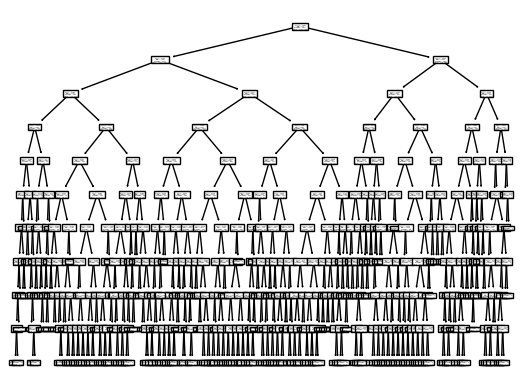

In [43]:
plot_tree(dt)
print()

# 2) Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
print(rf.score(x_test,y_test)*100)
print(rf.score(x_train,y_train)*100)

81.9706498951782
100.0


In [47]:
y_pred_rf= rf.predict(x_test)
print(accuracy_score(y_pred_rf,y_test)*100)
print(classification_report(y_pred_rf,y_test))

81.9706498951782
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       472
           1       0.81      0.84      0.82       482

    accuracy                           0.82       954
   macro avg       0.82      0.82      0.82       954
weighted avg       0.82      0.82      0.82       954



# Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 


In [61]:
param_grid_grcv = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}

#### GridSearchCV

In [62]:
grid_search = GridSearchCV(rf,param_grid_grcv) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_)
print(grid_search.score(x_train,y_train)*100)
print(grid_search.score(x_test,y_test)*100)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)
74.64604090194022
74.0041928721174


# After Hyperparameter Tuning

In [63]:
rf2 = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,n_estimators=50)
rf2.fit(x_train, y_train)

print(rf2.score(x_test,y_test)*100)
print(rf2.score(x_train,y_train)*100)

y_pred_rf2= rf2.predict(x_test)

print("accuracy_score => ",accuracy_score(y_pred_rf2,y_test)*100)
print(classification_report(y_pred_rf2,y_test))

73.06079664570231
74.6722600943891
accuracy_score =>  73.06079664570231
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       463
           1       0.73      0.75      0.74       491

    accuracy                           0.73       954
   macro avg       0.73      0.73      0.73       954
weighted avg       0.73      0.73      0.73       954



#### RandomizedSearchCV

In [64]:
random_search = RandomizedSearchCV(rf, param_grid_grcv) 
random_search.fit(x_train, y_train) 
print(random_search.score(x_test,y_test)*100)
print(random_search.score(x_train,y_train)*100)
print(random_search.best_estimator_)

74.0041928721174
74.96067121132668
RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


In [65]:
rf = RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,n_estimators=25)
rf.fit(x_train, y_train)
print(rf.score(x_test,y_test)*100)
print(rf.score(x_train,y_train)*100)

72.74633123689728
74.20031463030938


# 3) XGB Classifier

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb = XGBClassifier()

In [68]:
xgb.fit(x_train, y_train)
y_pred_xgb=xgb.predict(x_test)

In [69]:
print(accuracy_score(y_pred_xgb,y_test)*100)
print(classification_report(y_pred_xgb,y_test))

79.55974842767296
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       475
           1       0.78      0.82      0.80       479

    accuracy                           0.80       954
   macro avg       0.80      0.80      0.80       954
weighted avg       0.80      0.80      0.80       954



In [70]:
print(xgb.score(x_test, y_test)*100)
print(xgb.score(x_train, y_train)*100)

79.55974842767296
99.52805453592029


In [71]:
import pickle
with open('wine_model_2.pkl', 'wb') as f:
    pickle.dump(rf2, f)

print(" Your Model is saved as 'wine_model.pkl' ")

 Your Model is saved as 'wine_model.pkl' 


Conclusion: The XGBoost model was chosen for its accuracy of around 79.56%, but further experimentation with Random Forest’s hyperparameters showed potential improvement.